# Surf's Up: SQL Alchemy Challenge
GWU Data Analytics Bootcamp Homework 11

In [1]:
# Import dependencies

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta

In [2]:
# Connect to SQLite database

engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [3]:
# Automap classes

Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
# Obtain table names

Base.classes.keys()

['measurements', 'stations']

In [5]:
# Create classes based on table schema

Measurement = Base.classes.measurements
Station = Base.classes.stations

In [6]:
# Initiate session

session = Session(engine)

### Precipitation Analysis

In [7]:
# Find most recent date in dataframe

max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
max_date = date(*map(int, max_date.split('-')))

# Find date one year before most recent date in database

one_year_before_max_date = max_date - timedelta(days=365)
one_year_before_max_date = one_year_before_max_date.strftime('%Y-%m-%d')

# Query database for precipitation recordings over past year

precipitation_df = pd.read_sql(f'SELECT date, prcp FROM measurements WHERE date >= "{one_year_before_max_date}"', conn)
precipitation_df = precipitation_df.set_index('date')

# Print first 5 rows

precipitation_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


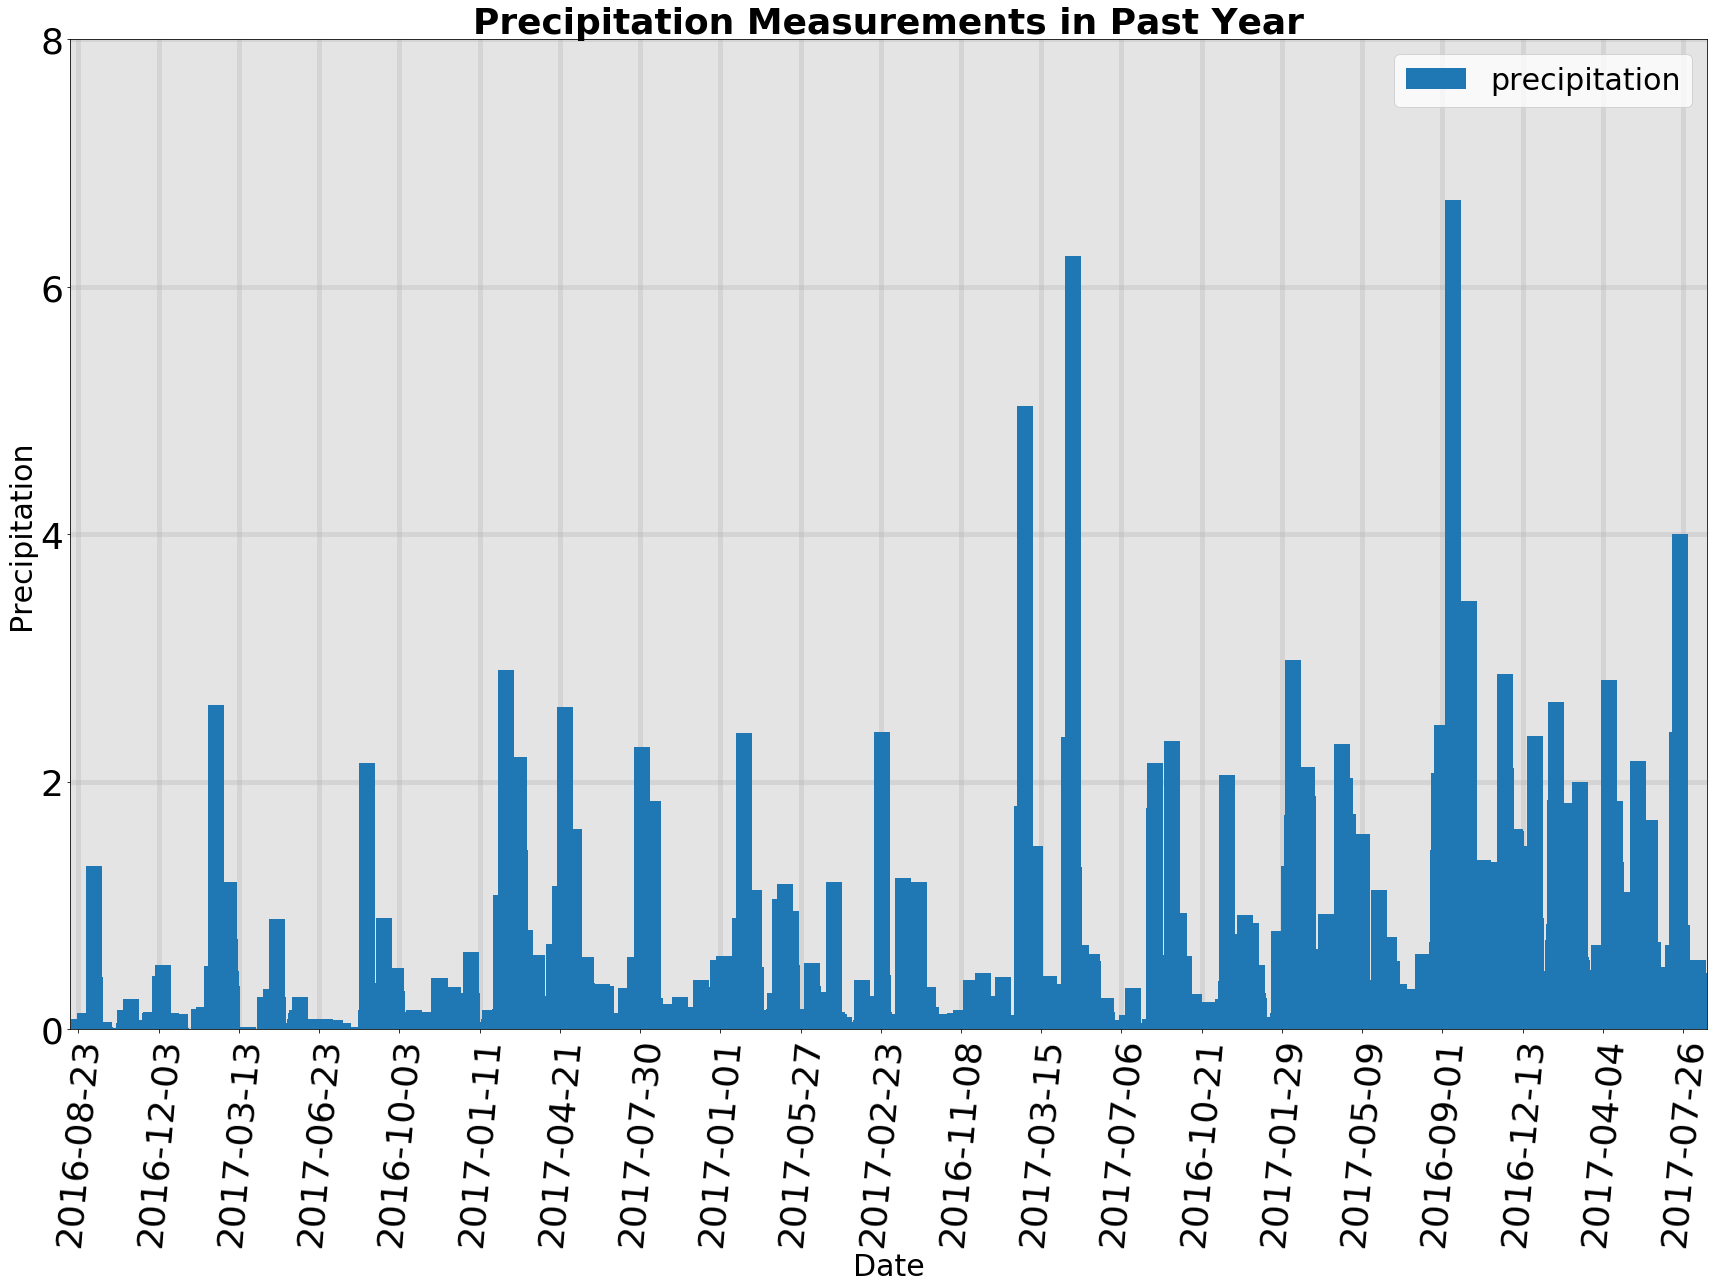

In [18]:
# Create bar chart from precipitation data

ax = precipitation_df.plot(kind='bar', rot=85, width=20.0, figsize=(24,18), fontsize=36)

# Format x-axis to only print every 100th tick label

x_ticks = ax.xaxis.get_ticklocs()
x_ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(x_ticks[::100])
ax.xaxis.set_ticklabels(x_ticklabels[::100])

# Format y-axis to print every other tick label

y_ticks = ax.yaxis.get_ticklocs()
ax.yaxis.set_ticks(y_ticks[::2])

# Format legend and labels

ax.legend(['precipitation'], fontsize=30)
ax.set_xlabel('Date', fontsize=30)
ax.set_ylabel('Precipitation', fontsize=30)
ax.set_title('Precipitation Measurements in Past Year', fontsize=36, fontweight='bold')

# Format background color and grid

ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.6)
plt.grid(linewidth=5, alpha=0.3)
ax.set_axisbelow(True)

# Save graph to PNG

plt.tight_layout()
plt.savefig('Images/precipitation_analysis.png')

In [13]:
# Print summary statistics for precipitation data

precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [18]:
# Query database to find distinct count of reporting stations and print result

station_analysis_df = pd.read_sql('SELECT COUNT(DISTINCT(station)) AS stations_count FROM measurements', conn)
station_analysis_df

,stations_count
0,9


In [14]:
# Query database to find record count per station and print result (order by descending number of records)

station_counts_df = pd.read_sql('SELECT station, COUNT(*) AS station_count FROM measurements GROUP BY station ORDER BY station_count DESC', conn)
station_counts_df

,station,station_count
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [16]:
# Retrieve station with most records and save to variable

most_active_station = station_counts_df['station'].values[0]
print(f"The most active station is {most_active_station}.")

The most active station is USC00519281.


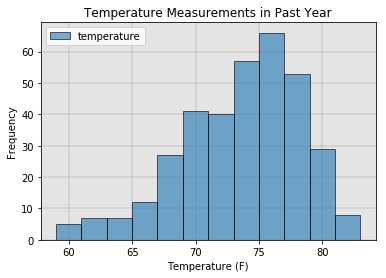

In [17]:
# Query database to find temperature recordings for most active station over past year and save to dataframe

station_temps_df = pd.read_sql(f'SELECT tobs FROM measurements WHERE station = "{most_active_station}" AND date >= "{one_year_before_max_date}"', conn)

# Create histogram of data

ax = station_temps_df.plot(kind='hist', bins=12, edgecolor='black', alpha=0.6)

# Format graph background color and grid

ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.6)
plt.grid(linewidth=2, alpha=0.3)
ax.set_axisbelow(True)

# Add x-axis label and graph title

ax.set_xlabel('Temperature (F)')
ax.set_title('Temperature Measurements in Past Year')

# Set field name in legend

plt.legend(['temperature'])

# Save graph

plt.savefig('Images/temperature_analysis.png')

### Temperature Analysis

The minimum temperature between July 01, 2017 and July 08, 2017 was 71 degress Fahrenheit.
The maximum temperature between July 01, 2017 and July 08, 2017 was 81 degress Fahrenheit.
The average temperature between July 01, 2017 and July 08, 2017 was 77.46 degress Fahrenheit.


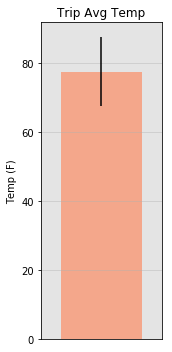

In [103]:
# Define function to calculate min, max, and avg temperature values between dates one year before given start and end dates

def calc_temps(start_date, end_date):
    
# Declare global variables
    
    global min_temp
    global max_temp
    global avg_temp
    global avg_temp_df
    
# Calculate dates one year before declared start and end dates
    
    start_date = date(*map(int, start_date.split('-')))
    start_date = start_date - timedelta(days=365)
    start_date = start_date.strftime('%Y-%m-%d')
    end_date = date(*map(int, end_date.split('-')))
    end_date = end_date - timedelta(days=365)
    end_date = end_date.strftime('%Y-%m-%d')
    
# Calculate and assign min, max, and avg temperature values between dates one year before start and end dates
    
    min_temp_df = pd.read_sql(f'SELECT MIN(tobs) FROM measurements WHERE date BETWEEN "{start_date}" AND "{end_date}"', conn)
    min_temp = min_temp_df.values[0][0]
    max_temp_df = pd.read_sql(f'SELECT MAX(tobs) FROM measurements WHERE date BETWEEN "{start_date}" AND "{end_date}"', conn)
    max_temp = max_temp_df.values[0][0]
    avg_temp_df = pd.read_sql(f'SELECT AVG(tobs) FROM measurements WHERE date BETWEEN "{start_date}" AND "{end_date}"', conn)
    avg_temp = avg_temp_df.values[0][0]

# Declare start and end dates
    
vacation_start = "2018-07-01"
vacation_end = "2018-07-08"

# Run declared start and end dates through function

calc_temps(vacation_start, vacation_end)

# Calculate dates one year before vacation start and end dates for printing purposes

vacation_start = date(*map(int, vacation_start.split('-')))
one_year_before_vacation_start = vacation_start - timedelta(days=365)
one_year_before_vacation_start = one_year_before_vacation_start.strftime('%B %d, %Y')

vacation_end = date(*map(int, vacation_end.split('-')))
one_year_before_vacation_end = vacation_end - timedelta(days=365)
one_year_before_vacation_end = one_year_before_vacation_end.strftime('%B %d, %Y')

# Print aggregate values for temperature values between dates one year before declared start and end dates

print(f"The minimum temperature between {one_year_before_vacation_start} and {one_year_before_vacation_end} was {min_temp} degress Fahrenheit.")
print(f"The maximum temperature between {one_year_before_vacation_start} and {one_year_before_vacation_end} was {max_temp} degress Fahrenheit.")
print(f"The average temperature between {one_year_before_vacation_start} and {one_year_before_vacation_end} was {round(avg_temp, 2)} degress Fahrenheit.")

# Create bar chart of mean temperature with error bars indicating range spread above and below mean

ax = avg_temp_df.plot(kind='bar', yerr=(max_temp - min_temp), figsize=(2.5, 5), color='coral', width=1.0, alpha=0.6, title='Trip Avg Temp', legend=False)
plt.xticks([])

# Format chart background and grid

ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.6)
plt.grid(alpha=0.5)

# Set y-label for chart

ax.set_ylabel("Temp (F)")

# Save chart to PNG

plt.tight_layout()
plt.savefig("Images/average_temps.png")

### Optional Recommended Analysis: Total Precipitation by Station for Trip Dates

In [102]:
def prcp_tots_func(start_date, end_date):
    
# Declare global variables
    
    global grouped_prcp_df
    
# Calculate dates one year before declared start and end dates
    
    start_date = date(*map(int, start_date.split('-')))
    start_date = start_date - timedelta(days=365)
    start_date = start_date.strftime('%Y-%m-%d')
    end_date = date(*map(int, end_date.split('-')))
    end_date = end_date - timedelta(days=365)
    end_date = end_date.strftime('%Y-%m-%d')

# Query SQLite database to obtain precipitation values one year before trip date range
    
    prcp_tot_df = pd.read_sql(f'SELECT station, prcp FROM measurements WHERE date BETWEEN "{start_date}" AND "{end_date}"', conn)

# Group dataframe by station and sum precipitation values
    
    grouped_prcp_df = prcp_tot_df.groupby(['station']).sum()

# Run function on declared start and end dates

prcp_tots_func('2018-07-01', '2018-07-08')

# Print grouped dataframe

grouped_prcp_df

,prcp
station,
USC00513117,0.31
USC00514830,0.06
USC00516128,1.34
USC00519281,0.64
USC00519397,0.12
USC00519523,0.02


### Optional Recommended Analysis: Normal Temperatures for Trip Dates

In [8]:
# Create function to capture normal values between start and end dates inclusive and convert them to lists

def daily_normals(start_date, end_date):
    
# Declare global variables
    
    global norms_df
    global short_dates_df
    global date_range
    
# Turn start and end dates into datetime objects
    
    start_date = date(*map(int, start_date.split('-')))
    end_date = date(*map(int, end_date.split('-')))
    
# Calculate date one year before end date
    
    one_year_before_end_date = end_date - timedelta(days=365)
    
# Extract month and day number from start date
    
    new_start_date = start_date.strftime('-%m-%d')

# Query SQLite database to gather all rows that have the same day and month as the start date but are at least one year before the start date 
    
    agg_df = pd.read_sql(f'SELECT * FROM measurements WHERE date LIKE "%{new_start_date}"', conn)

# Group that dataframe by year
    
    grouped_agg_df = agg_df.groupby(['date'])

# Create and initialize lists for normal values
    
    date_range = [start_date.strftime('%Y-%m-%d')]
    short_dates = [start_date.strftime('%m-%d')]
    min_norms = [grouped_agg_df['tobs'].min().mean()]
    max_norms = [grouped_agg_df['tobs'].max().mean()]
    avg_norms = [grouped_agg_df['tobs'].mean().mean()]

# Gather dates and normal data values for dates between day after start date and end date inclusive
    
    while start_date < end_date:
        start_date = start_date + timedelta(days=1)
        date_range.append(start_date.strftime('%Y-%m-%d'))
        short_dates.append(start_date.strftime('%m-%d'))
        new_start_date = start_date.strftime('-%m-%d')
        agg_df = pd.read_sql(f'SELECT * FROM measurements WHERE date LIKE "%{new_start_date}" AND date <= "{one_year_before_end_date}"', conn)
        grouped_agg_df = agg_df.groupby(['date'])
        min_norms.append(grouped_agg_df['tobs'].min().mean())
        max_norms.append(grouped_agg_df['tobs'].max().mean())
        avg_norms.append(grouped_agg_df['tobs'].mean().mean())

# Create dataframe using normal values for all dates between start and end dates inclusive
        
    norms_dict = {'date':date_range, 'min':min_norms, 'max':max_norms, 'avg':avg_norms}
    norms_df = pd.DataFrame(norms_dict)
    
# Set index of normal values dataframe as date
    
    norms_df = norms_df.set_index('date')
    
# Create dataframe using normal values with shortened dates for all dates between start and end dates inclusive
        
    short_dates_dict = {'date':short_dates, 'min':min_norms, 'max':max_norms, 'avg':avg_norms}
    short_dates_df = pd.DataFrame(short_dates_dict)
    
# Set index of normal values dataframe with shortened dates as date
    
    short_dates_df = short_dates_df.set_index('date')

# Declare start and end dates and apply daily normals function
    
daily_normals('2018-07-01', '2018-07-08')

# Print dataframe with shortened dates

short_dates_df

,avg,max,min
date,,,
07-01,75.298958,78.750,70.750
07-02,75.788542,79.125,71.500
07-03,75.203423,78.250,71.625
07-04,76.866815,79.750,73.750
07-05,74.974702,78.500,71.250
07-06,74.963839,79.000,71.250
07-07,75.003770,78.250,71.250
07-08,75.735863,79.250,71.375


/Users/annariehle/anaconda/envs/py36/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


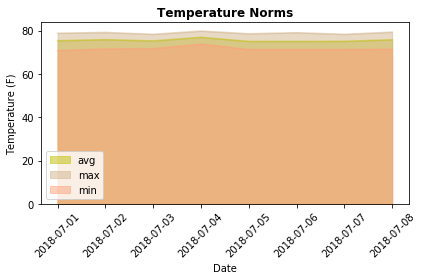

In [9]:
# Create plot using values from daily normals function

ax = norms_df.plot(kind='area', stacked=False, rot=45, colors=['y', 'tan', 'lightsalmon'])

# Set x-ticks and x-tick labels

ax.xaxis.set_ticks(np.arange(len(date_range)))
x_ticklabels = date_range
ax.xaxis.set_ticklabels(x_ticklabels)

# Set y-axis to use every other tick and tick label

y_ticks = ax.yaxis.get_ticklocs()
ax.yaxis.set_ticks(y_ticks[::2])

# Set labels for x- and y-axis and title for chart

ax.set_ylabel('Temperature (F)')
ax.set_xlabel('Date')
ax.set_title('Temperature Norms', fontweight='bold')

# Save chart as PNG

plt.tight_layout()
plt.savefig("Images/temperature_norms.png")